# Visão geral do projeto<br>
Você trabalha na empresa de mineração OilyGiant. Sua tarefa é encontrar os melhores lugares para o desenvolvimento de novos poços de petróleo.<br>
Para concluir essa tarefa, você vai precisar executar as seguintes etapas:<br>
•	Ler os arquivos com parâmetros coletados de poços de petróleo na região selecionada: a quantidade de petróleo e o volume de reservas;<br>
•	Construir um modelo para predizer o volume de reservas em novos poços;<br>
•	Escolher os poços de petróleo que têm os maiores valores estimados;<br>
•	Escolher a região com o maior lucro total para os poços de petróleo selecionados.<br>
Você tem dados sobre amostras de petróleo de três regiões. Os parâmetros de cada poço de petróleo na região já são conhecidos. Construa um modelo que te ajudará a escolher a região com a margem de lucro mais alta. Utilize a técnica de Bootstrapping para analisar lucro potencial e riscos.


# Descrição de dados
Os dados de exploração geológica para as três regiões estão armazenados em arquivos:<br>
•	geo_data_0.csv. baixe o conjunto de dados<br>
•	geo_data_1.csv. baixe o conjunto de dados<br>
•	geo_data_2.csv. baixe o conjunto de dados<br>
•	id — identificador unívoco de poço de petróleo<br>
•	f0, f1, f2 — três características de pontos (seu significado específico não é importante, mas as próprias características são significativas)<br>
•	product — volume de reservas no poço de petróleo (milhares de barris).


# Condições:
•	Apenas regressão linear pode ser usada para o treinamento do modelo (o resto não são previsíveis o suficiente).<br>
•	Ao explorar a região, um estudo de 500 pontos é realizado e os melhores 200 pontos são selecionados para calcular o lucro.<br>
•	O orçamento para o desenvolvimento de 200 poços de petróleo é 100 milhões de dólares.<br>
•	Um barril de petróleo bruto traz 4.5 dólares de receita. A receita de uma unidade de produto é 4.500 dólares (o volume de reservas está em milhares de barris).<br>
•	Depois de ter avaliado os riscos, mantenha apenas as regiões com o risco de perdas inferior a 2.5%. Entre aquelas que se enquadram no critério, você precisa selecionar a região com o lucro médio mais alto.<br>
Os dados são sintéticos e não incluem nenhum detalhe de contratos ou características de poços.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter

## Baixe e prepare os dados. Explique o procedimento.

In [2]:
data_region_0 = pd.read_csv('/datasets/geo_data_0.csv')

print(data_region_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [3]:
data_region_1 = pd.read_csv('/datasets/geo_data_1.csv')

print(data_region_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [4]:
data_region_2 = pd.read_csv('/datasets/geo_data_2.csv')

print(data_region_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


## Treine e teste o modelo para cada região

In [5]:
def train_model_mean_rmse(data):
    features = data.drop(['id', 'product'], axis = 1)
    target = data['product']
    
    # Divida os dados em um conjunto de treinamento e um conjunto de validação em uma proporção de 75:25.
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    # Treine o modelo e faça predições para o conjunto de validação.
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    
    mean = predictions_valid.mean()
    rmse = mean_squared_error(target_valid, predictions_valid, squared=False)
    
    return model, mean, rmse, predictions_valid

### Salve as predições e respostas corretas no conjunto de validação e Imprima o volume médio previsto de reservas e o REQM do modelo.

In [6]:
r0_model, r0_mean, r0_rmse, r0_predictions = train_model_mean_rmse(data_region_0)

print('Média da Região 0:', r0_mean)
print('REQM da Região 0:', r0_rmse)

Média da Região 0: 92.59256778438035
REQM da Região 0: 37.5794217150813


In [7]:
r1_model, r1_mean, r1_rmse, r1_predictions = train_model_mean_rmse(data_region_1)

print('Média da Região 1:', r1_mean)
print('REQM da Região 1:', r1_rmse)

Média da Região 1: 68.728546895446
REQM da Região 1: 0.893099286775617


In [8]:
r2_model, r2_mean, r2_rmse, r2_predictions = train_model_mean_rmse(data_region_2)

print('Média da Região 2:', r2_mean)
print('REQM da Região 2:', r2_rmse)

Média da Região 2: 94.96504596800489
REQM da Região 2: 40.02970873393434


### Analise os resultados.

A média de produção da região 2 é a maior entre as 3 regiões, mas tem um desvio padrão maior, e a região 1 tem menor produção e menor desvio padrão. A região 2 pode ser a mais produtiva e a menos também, enquanto a região 0 é bem parecida com ela. A região 1 apesar de ter menor média parece ser a mais previsível. 

## Prepare-se para o cálculo de lucro

### Armazene todos os valores necessários para os cálculos em variáveis separadas.

In [9]:
barril_revenue = 4.5
budget = 100000000
least_mean_revenue = 111.1

### Dado o investimento de 100 milhões para 200 poços de petróleo, cada um precisa produzir, em média, uma quantidade de unidades equivalente a pelo menos 500 mil dólares para evitar prejuízos (isso é aproximadamente 111,1 unidades). Compare essa quantidade com o volume médio de cada região.

In [10]:
def region_viability(mean_product, barril_revenue, region):
    # Cálculo da média de receita de uma região
    mean_revenue = mean_product * barril_revenue
    string = f'A média de produção da região {region} é {mean_revenue:.2f} e ela é ' 
    if mean_revenue >= least_mean_revenue:
        string += 'lucrativa'
    else:
        string += 'deficitária'
    return string 

In [11]:
region_viability(r0_mean, barril_revenue, '0')

'A média de produção da região 0 é 416.67 e ela é lucrativa'

In [12]:
region_viability(r1_mean, barril_revenue, '1')

'A média de produção da região 1 é 309.28 e ela é lucrativa'

In [13]:
region_viability(r2_mean, barril_revenue, '2')

'A média de produção da região 2 é 427.34 e ela é lucrativa'

### Forneça conclusões sobre a etapa de preparação para o cálculo de lucro.

De acordo com a média de volume da produção a região 2 tem maior média, e é promissora para ser a região onde novos poços devem ser explorados.

## Escreva uma função para calcular lucro de um conjunto de poços de petróleo selecionados e predições do modelo:

In [14]:
# Função para calcular o lucro de uma região
def profit_calculator(predictions, barril_revenue, budget, amount=0):
    if(amount==0):
        amount = len(predictions)
    # Escolha os 200 poços com os valores mais altos previstos
    top_wells = sorted(predictions, reverse=True)[0:amount]
    top_wells = pd.Series(top_wells)
    
    # Sumarize o volume alvo de reservas de acordo com essas predições. 
    # Armazene as predições para os 200 poços para cada uma das 3 regiões.
    total_volume = top_wells.sum()
    
    # Calcular o lucro potencial (*1000 pq a unidade está em milhares de barris)
    potential_profit = total_volume * barril_revenue * 1000 - budget
    
    return potential_profit


### Calcule o lucro potencial dos 200 melhores poços por região

In [15]:
# Calcular o lucro potencial para a região 0
potential_profit_0 = profit_calculator(r0_predictions, barril_revenue, budget, 200)
print(f"Lucro potencial para a região 0: {potential_profit_0:,.2f}", )

Lucro potencial para a região 0: 39,960,488.77


In [16]:
# Calcular o lucro potencial para a região 1
potential_profit_1 = profit_calculator(r1_predictions, barril_revenue, budget, 200)
print(f"Lucro potencial para a região 1: {potential_profit_1:,.2f}", )

Lucro potencial para a região 1: 24,857,120.52


In [17]:
# Calcular o lucro potencial para a região 2
potential_profit_2 = profit_calculator(r2_predictions, barril_revenue, budget, 200)
print(f"Lucro potencial para a região 2: {potential_profit_2:,.2f}", )

Lucro potencial para a região 2: 33,217,543.96


### Apresente suas conclusões: sugira uma região para o desenvolvimento de poços de petróleo e justifique sua escolha.

De acordo com o potencial de lucro, a região 0 é mais promissora para desenvolvimento de poços de petróleo, e também tem um desvio padrão menor do que da região 2 que é a segunda com maior lucro potencial.

## Calcule riscos e lucro para cada região

In [18]:
state = np.random.RandomState(12345)

In [19]:
# Usando as predições que você armazenou, 
# use a técnica de bootstrapping com 1.000 amostras para encontrar a distribuição de lucros.

def risk_probability(predictions):
    predictions = pd.Series(predictions)
    profits = []
    # Booststrapping 1000 amostras
    for i in range(1000):
        subsample = predictions.sample(frac=1, replace=True, random_state=state)
        potential_profit = profit_calculator(subsample, barril_revenue, budget)
        profits.append(potential_profit)
    
    
    return profits

In [20]:
# # Encontre lucro médio, intervalo de confiança de 95% e o risco de prejuízo. Prejuízo é um lucro negativo, 
# calcule-o como uma probabilidade e depois o expresse como uma porcentagem.
def profit_analysis(predictions, region):
    profits = risk_probability(predictions)

    mean_profit = np.mean(profits)
    trust_interval = np.percentile(profits, [2.5, 97.5])
    loss_risk = np.mean(np.array(profits) < 0)
    

    print(f"Lucro médio para a região {region}: {mean_profit:,.2f}")
    print(f"Intervalo de confiança (95%) para a região {region}: {trust_interval[0]:,.2f} a {trust_interval[1]:,.2f}", )
    print(f"Risco de prejuízo para a região {region}: {loss_risk}")
    
    # Histograma
    fig, ax = plt.subplots(figsize=(13,4))
    plt.title('Gráfico de distribuição dos lucros nas amostras bootstrap')
    plt.xlabel('Lucro')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Quantidade')
    plt.hist(profits, 50, color='green')
    
    ax.xaxis.set_major_formatter(FormatStrFormatter('$%.0f'))

    plt.show()
    
    # Boxplot
    
    fig, ax = plt.subplots(figsize =(7, 5))
    plt.boxplot(profits)
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
 
    # show plot
    plt.show()
    

Lucro médio para a região 0: 10,317,103,821.79
Intervalo de confiança (95%) para a região 0: 10,283,108,786.69 a 10,348,496,434.29
Risco de prejuízo para a região 0: 0.0


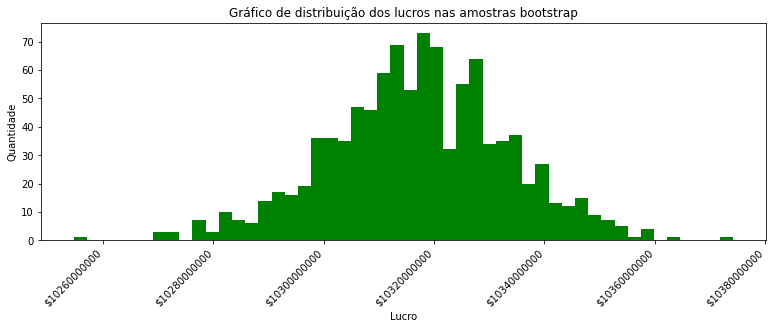

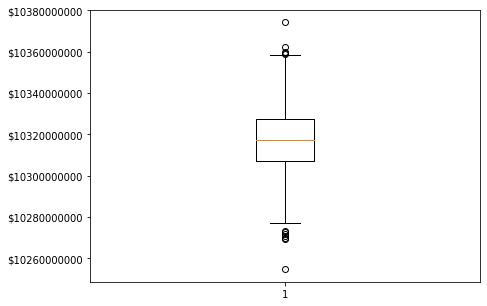

In [21]:
profit_analysis(r0_predictions, '0')

Lucro médio para a região 1: 7,631,976,107.83
Intervalo de confiança (95%) para a região 1: 7,567,303,811.66 a 7,699,580,247.83
Risco de prejuízo para a região 1: 0.0


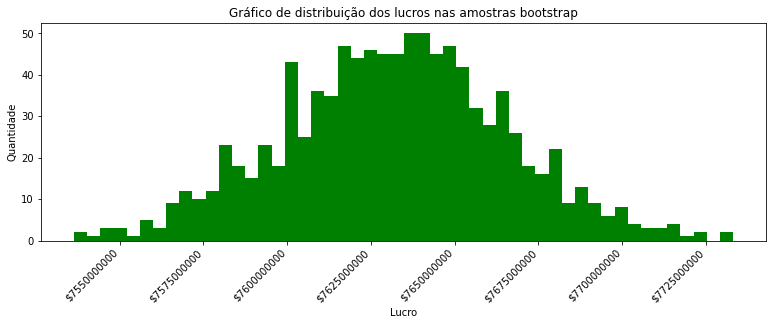

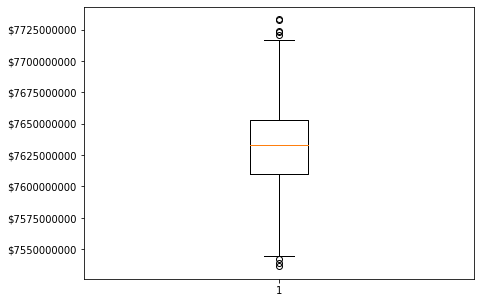

In [22]:
profit_analysis(r1_predictions, '1')

Lucro médio para a região 2: 10,584,128,560.06
Intervalo de confiança (95%) para a região 2: 10,556,988,938.69 a 10,611,554,584.20
Risco de prejuízo para a região 2: 0.0


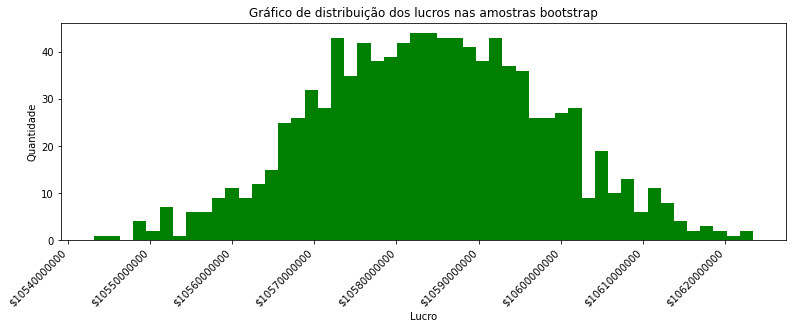

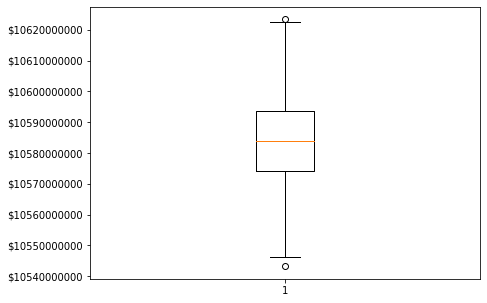

In [23]:
profit_analysis(r2_predictions, '2')

### Apresente suas conclusões: sugira uma região para o desenvolvimento de poços de petróleo e justifique sua escolha. A sua escolha corresponde à escolha anterior?

A melhor região para o desenvolvimento de poços petróleo é a região 2, com média de lucro e intervalo de confiança com mais lucro que as outra regiões. Ao contrário do que havia sido apontado na outra seção que havia sugerido a região 0. Nos gráficos podemos ver a distribuição das amostras bootstrap e a região 0 possui mais outliers, conforme boxplot, e mesmo eles não têm os lucros previstos na região 